### 循环图（Looping Graph）

目标：

1. 实现循环逻辑，让数据流返回节点
2. 创建单个条件边用于决策和控制流程

主要目标：编写循环逻辑

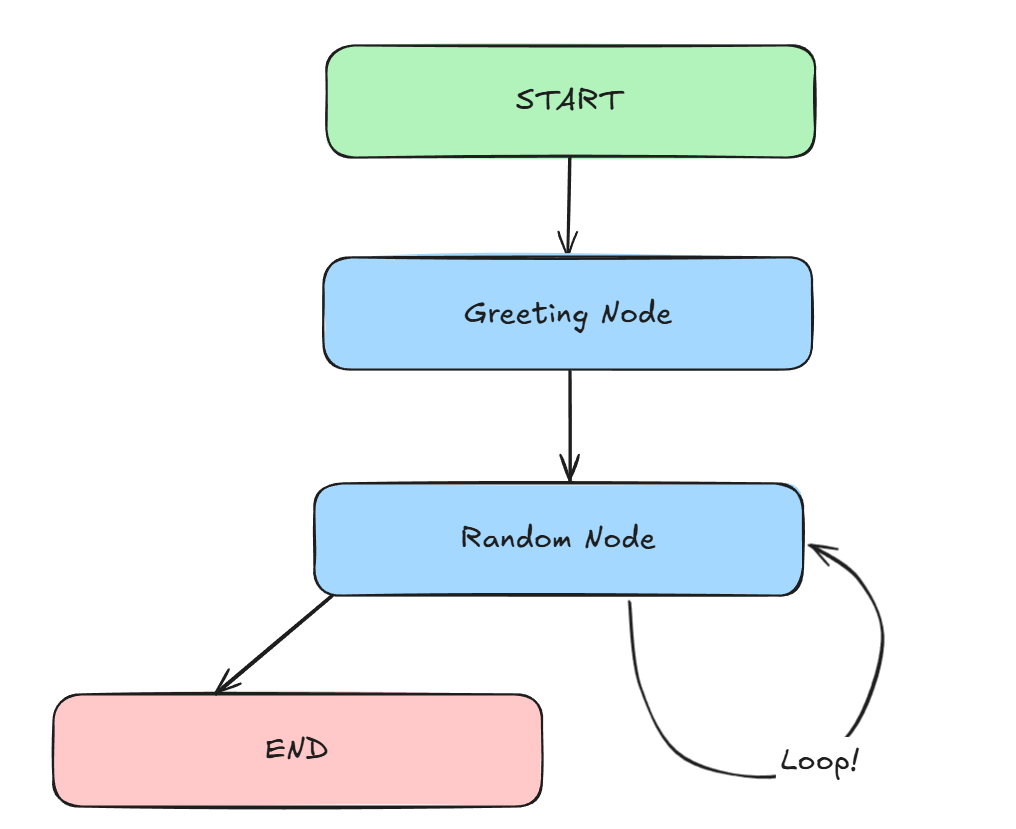

In [28]:
from typing import List,Dict,TypedDict
from langgraph.graph import StateGraph,START,END
import random

In [29]:
class AgentState(TypedDict):
    name:str
    numbers:List[int]
    counter:int

In [30]:
def greeting_node(state:AgentState) -> AgentState:
    """向对方打招呼的问候节点"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0
    return state

def random_node(state:AgentState) -> AgentState:
    """生成 0 到 10 之间的随机数"""
    state["numbers"].append(random.randint(0,10))
    state["counter"] += 1
    return state

def should_continue(state:AgentState) -> AgentState:
    """决定下一步做什么的功能"""
    if state["counter"] < 5 :
        return "loop"
    else:
        return "exit"

In [33]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node",greeting_node)
graph.add_node("random_node",random_node)

graph.add_edge(START,"greeting_node")
graph.add_edge("greeting_node","random_node")
graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop":"random_node",
        "exit":END
    }
)

app = graph.compile()

In [34]:
answer = app.invoke({"name":"Vaibhav", "numbers":[], "counter":-100})

In [35]:
answer

{'name': 'Hi there, Vaibhav', 'numbers': [5, 8, 10, 9, 0], 'counter': 5}